# Análise de solicitação de crédito

**Objetivo desta análise**: determinar para cada solicitação de crédito o valor de **Risk** baseado nos outros atributos (por exemplo, Age, Sex, Job, Housing, ...).

Risk <- Age + Sex + Job + ... + Purpose

## Aquisição dos dados e pré-processamento

In [8]:
import pandas as pd
#df = pd.read_csv("https://raw.githubusercontent.com/fbarth/ml-espm/master/dataset/german_credit_data.csv")
df = pd.read_csv("../../dataset/german_credit_data.csv")

In [11]:
type(df)

pandas.core.frame.DataFrame

In [12]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [14]:
df.shape

(1000, 11)

In [18]:
df.iloc[0:1000,]

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [21]:
df = df.drop(columns=['Unnamed: 0'])

## Análise descritiva

In [22]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [67]:
df = df.rename(columns={
    "Age": "age", 
    "Sex": "sex", 
    "Job": "job", 
    "Housing": "housing", 
    "Saving accounts": "savingAccount",
    "Checking account": "checkingAccount",
    "Credit amount": "creditAmount",
    "Duration": "duration",
    "Purpose": "purpose",
    "Risk": "risk"
})

In [68]:
df.head()

,age,sex,job,housing,savingAccount,checkingAccount,creditAmount,duration,purpose,risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [69]:
df['risk'].value_counts()

good    700
bad     300
Name: risk, dtype: int64

Visto que a variável Risk é categórica então podemos dizer que este é um problema de **classificação**.

Isto é importante para: 
* Definir as métricas de como o modelo será avaliado, e;
* Escolher o melhor algoritmo para criar o modelo.

Descrição dos atributos: 

* Age (numeric)
* Sex (text: male, female)
* Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
* Housing (text: own, rent, or free)
* Saving accounts (text - little, moderate, quite rich, rich)
* Checking account (numeric, in DM - Deutsch Mark)
* Credit amount (numeric, in DM)
* Duration (numeric, in month)
* Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

*Dúvida*: deixamos o atributo Job como número ou transformamos para categórico? 

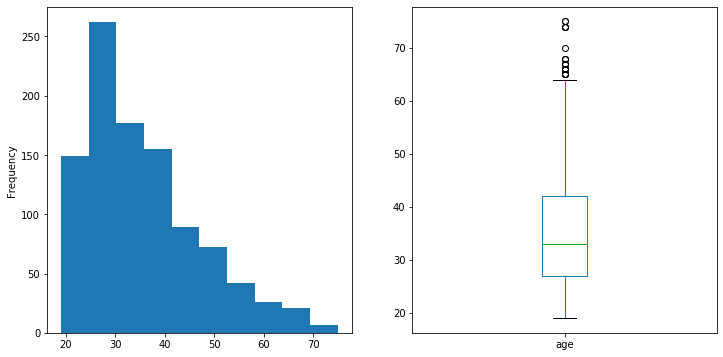

In [70]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6)) 
df['age'].plot(kind='hist', ax=axes[0])
df['age'].plot(kind='box', ax=axes[1])

In [71]:
df['age'].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: age, dtype: float64

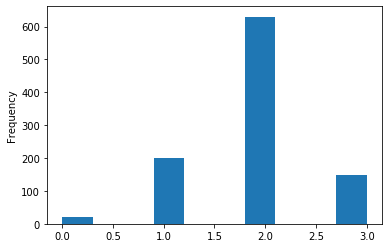

In [72]:
df['job'].plot(kind='hist')

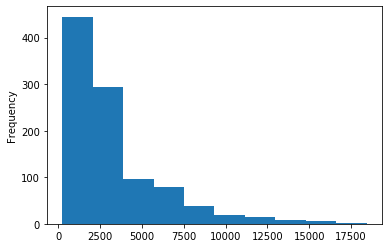

In [73]:
df['creditAmount'].plot(kind='hist')

In [74]:
df['creditAmount'].describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: creditAmount, dtype: float64

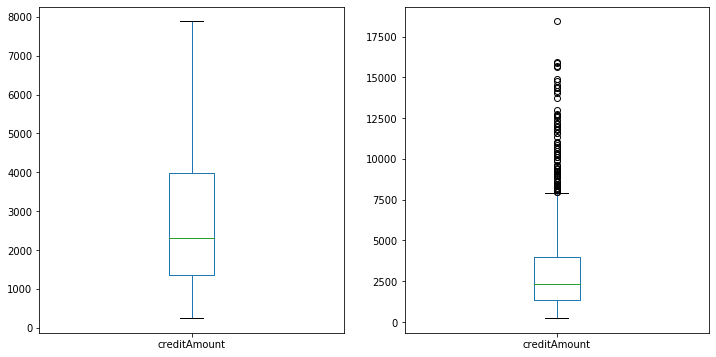

In [76]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6)) 
#figure(figsize=(7,5))
df['creditAmount'].plot(kind='box', showfliers=False, ax=axes[0])
df['creditAmount'].plot(kind='box', ax=axes[1])

In [77]:
df['sex'].value_counts()

male      690
female    310
Name: sex, dtype: int64

In [78]:
df['job'].value_counts()

2    630
1    200
3    148
0     22
Name: job, dtype: int64

In [79]:
df['housing'].value_counts()

own     713
rent    179
free    108
Name: housing, dtype: int64

In [80]:
df['savingAccount'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: savingAccount, dtype: int64

In [81]:
df['savingAccount'].isnull().sum() / df.shape[0]

0.183

In [82]:
df['checkingAccount'].value_counts()

little      274
moderate    269
rich         63
Name: checkingAccount, dtype: int64

In [83]:
df['checkingAccount'].isnull().sum() / df.shape[0]

0.394

In [84]:
df.head()

,age,sex,job,housing,savingAccount,checkingAccount,creditAmount,duration,purpose,risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


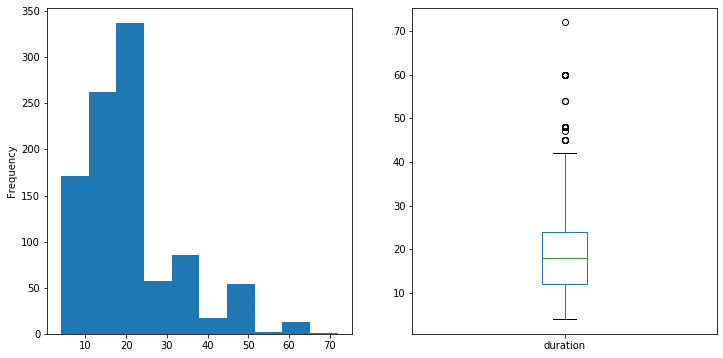

In [85]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6)) 
df['duration'].plot(kind='hist', ax=axes[0])
df['duration'].plot(kind='box', ax=axes[1])

In [86]:
df['purpose'].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: purpose, dtype: int64

In [87]:
df['purpose'].isnull().sum() / df.shape[0]

0.0

In [88]:
df['risk'].isnull().sum() / df.shape[0]

0.0

In [89]:
df.isnull().sum()

age                  0
sex                  0
job                  0
housing              0
savingAccount      183
checkingAccount    394
creditAmount         0
duration             0
purpose              0
risk                 0
dtype: int64

Text(0, 0.5, 'Duration')

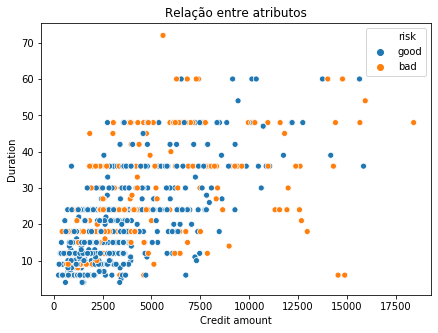

In [96]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5))

import seaborn as sns
x = sns.scatterplot(x='creditAmount', y='duration', data=df, hue='risk')
x.set_title("Relação entre atributos")
x.set_xlabel("Credit amount")
x.set_ylabel("Duration")

bad          AxesSubplot(0.1,0.15;0.363636x0.75)
good    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

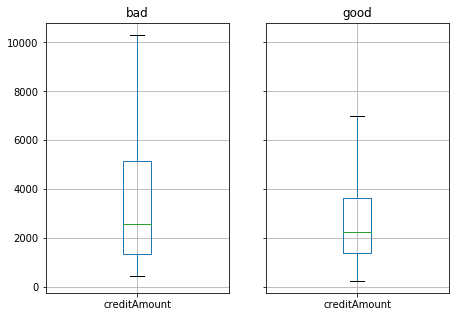

In [108]:
grouped = df[['creditAmount','risk']].groupby('risk')
grouped.boxplot(figsize=(7,5), showfliers=False)